# Import libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
import matplotlib
matplotlib.__version__

'3.10.0'

# Import Dataset

In [3]:
df = pd.read_csv('newyork_citibike_data.csv', index_col=0, low_memory=False, parse_dates=['started_at', 'ended_at'])

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date,date,avgTemp,_merge
0,25098D3FFB6B3BBD,electric_bike,2022-07-04 17:00:41.408,2022-07-04 17:19:00.525,Central Park West & W 85 St,7354.01,Grand Army Plaza & Central Park S,6839.10,40.784760,-73.969862,40.764397,-73.973715,casual,2022-07-04,2022-07-04,2022-07-04,25.6,both
1,FCED437CC64165BA,classic_bike,2022-01-14 09:18:35.838,2022-01-14 09:27:58.570,W 4 St & 7 Ave S,5880.02,W 16 St & The High Line,6233.05,40.734011,-74.002939,40.743349,-74.006818,member,2022-01-14,2022-01-14,2022-01-14,4.8,both
2,22DE76A19BAD1251,electric_bike,2022-10-09 17:35:17.370,2022-10-09 18:08:06.487,Menahan St & Onderdonk Ave,5034.03,N 12 St & Bedford Ave,5450.04,40.705580,-73.909559,40.720798,-73.954847,member,2022-10-09,2022-10-09,2022-10-09,12.3,both
3,1A009107ED10A6FB,electric_bike,2022-08-05 19:10:15.391,2022-08-05 19:38:10.967,Hope St & Union Ave,5187.03,38 St & 30 Ave,6850.01,40.711662,-73.951458,40.764175,-73.915840,member,2022-08-05,2022-08-05,2022-08-05,29.3,both
4,2B63FBA517507650,classic_bike,2022-05-10 15:28:01.330,2022-05-10 15:29:29.183,6 Ave & W 33 St,6364.07,Broadway & W 29 St,6289.06,40.749013,-73.988484,40.746201,-73.988557,member,2022-05-10,2022-05-10,2022-05-10,15.4,both


In [5]:
# Drop unnecessary columns
df.drop(columns=['start_date', 'end_date', 'start_station_id', 'end_station_id', '_merge'], inplace=True)

In [6]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,25098D3FFB6B3BBD,electric_bike,2022-07-04 17:00:41.408,2022-07-04 17:19:00.525,Central Park West & W 85 St,Grand Army Plaza & Central Park S,40.784760,-73.969862,40.764397,-73.973715,casual,2022-07-04,25.6
1,FCED437CC64165BA,classic_bike,2022-01-14 09:18:35.838,2022-01-14 09:27:58.570,W 4 St & 7 Ave S,W 16 St & The High Line,40.734011,-74.002939,40.743349,-74.006818,member,2022-01-14,4.8
2,22DE76A19BAD1251,electric_bike,2022-10-09 17:35:17.370,2022-10-09 18:08:06.487,Menahan St & Onderdonk Ave,N 12 St & Bedford Ave,40.705580,-73.909559,40.720798,-73.954847,member,2022-10-09,12.3
3,1A009107ED10A6FB,electric_bike,2022-08-05 19:10:15.391,2022-08-05 19:38:10.967,Hope St & Union Ave,38 St & 30 Ave,40.711662,-73.951458,40.764175,-73.915840,member,2022-08-05,29.3
4,2B63FBA517507650,classic_bike,2022-05-10 15:28:01.330,2022-05-10 15:29:29.183,6 Ave & W 33 St,Broadway & W 29 St,40.749013,-73.988484,40.746201,-73.988557,member,2022-05-10,15.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298383,CC97820FF0AD109B,classic_bike,2022-07-21 12:14:41.547,2022-07-21 12:19:33.749,E 5 St & Cooper Sq,E 2 St & Avenue B,40.727690,-73.990993,40.722174,-73.983688,member,2022-07-21,29.8
298384,1DF1B7E1CB6EC263,classic_bike,2022-08-21 15:48:27.920,2022-08-21 15:53:08.397,Bank St & Washington St,W 4 St & 7 Ave S,40.736197,-74.008592,40.734011,-74.002939,member,2022-08-21,25.3
298385,F80578D8DFB6AB73,classic_bike,2022-02-23 17:28:27.165,2022-02-23 17:33:38.657,W 21 St & 6 Ave,8 Ave & W 27 St,40.741740,-73.994156,40.747968,-73.996637,member,2022-02-23,14.4
298386,B13119FBEA968D3E,classic_bike,2022-09-17 12:52:11.576,2022-09-17 12:54:28.582,E 31 St & 3 Ave,2 Ave & E 29 St,40.743943,-73.979661,40.741724,-73.978093,member,2022-09-17,20.8


In [7]:
df.shape

(298388, 13)

In [8]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
end_station_name              object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                          object
avgTemp                      float64
dtype: object

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
end_station_name              object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

In [11]:
# Filter the dataset to only include records from 2022
df = df[df['date'].dt.year == 2022]

In [12]:
df.shape

(298380, 13)

In [13]:
# Save the filtered dataset to a CSV file
df.to_csv('cleaned_citibike_data.csv', index=False)

# Create a line plot of the temperatures for 2022 plotted as time series using the weather dataframe

In [14]:
# Set 'date' as the index to facilitate time series analysis and plotting
df_temp = df.set_index('date')

In [15]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,
2022-07-04,25098D3FFB6B3BBD,electric_bike,2022-07-04 17:00:41.408,2022-07-04 17:19:00.525,Central Park West & W 85 St,Grand Army Plaza & Central Park S,40.784760,-73.969862,40.764397,-73.973715,casual,25.6
2022-01-14,FCED437CC64165BA,classic_bike,2022-01-14 09:18:35.838,2022-01-14 09:27:58.570,W 4 St & 7 Ave S,W 16 St & The High Line,40.734011,-74.002939,40.743349,-74.006818,member,4.8
2022-10-09,22DE76A19BAD1251,electric_bike,2022-10-09 17:35:17.370,2022-10-09 18:08:06.487,Menahan St & Onderdonk Ave,N 12 St & Bedford Ave,40.705580,-73.909559,40.720798,-73.954847,member,12.3
2022-08-05,1A009107ED10A6FB,electric_bike,2022-08-05 19:10:15.391,2022-08-05 19:38:10.967,Hope St & Union Ave,38 St & 30 Ave,40.711662,-73.951458,40.764175,-73.915840,member,29.3
2022-05-10,2B63FBA517507650,classic_bike,2022-05-10 15:28:01.330,2022-05-10 15:29:29.183,6 Ave & W 33 St,Broadway & W 29 St,40.749013,-73.988484,40.746201,-73.988557,member,15.4


In [16]:
# Ensure the 'started_at' column is in datetime format
df_temp['started_at'] = pd.to_datetime(df_temp['started_at'])

# Sort the dataframe by 'started_at' to arrange it from January to December
df_temp_sorted = df_temp.sort_values(by='started_at')

In [17]:
df_temp_sorted.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,
2022-01-01,A9785C2180CDB809,electric_bike,2022-01-01 00:01:53.509,2022-01-01 00:04:23.260,E 76 St & Park Ave,1 Ave & E 78 St,40.773763,-73.962221,40.771404,-73.953517,member,11.6
2022-01-01,3259B744E0D9649B,electric_bike,2022-01-01 00:02:21.971,2022-01-01 00:12:01.445,W 15 St & 7 Ave,W 36 St & 7 Ave,40.739355,-73.999318,40.752149,-73.989539,casual,11.6
2022-01-01,B545D72A3E552957,classic_bike,2022-01-01 00:08:40.998,2022-01-01 00:24:48.798,8 Ave & W 16 St,Washington Pl & 6 Ave,40.740983,-74.001702,40.732241,-74.000264,casual,11.6
2022-01-01,D13CCEDFB0F5D66C,electric_bike,2022-01-01 00:21:07.825,2022-01-01 00:27:39.319,Stanton St & Chrystie St,E 7 St & Ave C,40.722293,-73.991475,40.724129,-73.979013,casual,11.6
2022-01-01,0ACBB3A64A2C1E33,electric_bike,2022-01-01 00:21:08.100,2022-01-01 00:25:49.056,Little West St & 1 Pl,Little West St & 1 Pl,40.705693,-74.016777,40.705693,-74.016777,member,11.6


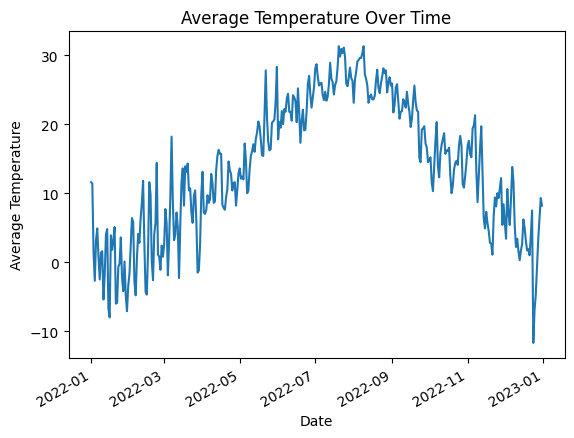

In [19]:
# Plot the average temperature
df_temp_sorted['avgTemp'].plot()

# Add labels and title
plt.xlabel('Date')  # Replace with your time column if necessary
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time')

# Show the plot
plt.show()

### I am trying procedural approach also for customizing the plot

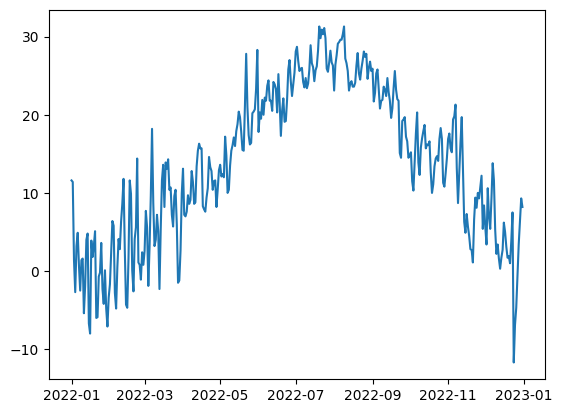

In [22]:
plt.plot(df_temp_sorted['avgTemp'])
plt.show()

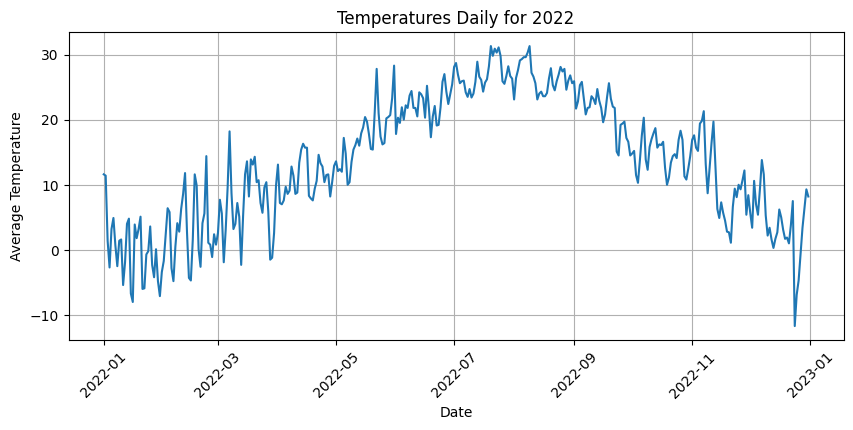

In [23]:
# Plot temperature trend for 2022
plt.figure(figsize=(10, 4))
plt.title('Temperatures Daily for 2022')
plt.plot(df_temp_sorted['avgTemp'])

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

# Create a column with the count of trips per day and merge it with the weather dataframe

In [24]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [25]:
# Groupby the count of the trips 
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [26]:
df_group.head()

,date,ride_id
0,2022-01-01,205
1,2022-01-02,445
2,2022-01-03,330
3,2022-01-04,353
4,2022-01-05,336


In [28]:
df_group.rename(columns = {'ride_id':'trips_per_day'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp_sorted = df.set_index('date')

print(df_temp_sorted.columns)

_merge
both          298380
left_only          0
right_only         0
Name: count, dtype: int64
Shape of January 1st is (205, 15)
Shape of January 2nd is (445, 15)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'avgTemp', 'trips_per_day',
       '_merge'],
      dtype='object')


In [29]:
df_temp_sorted.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,trips_per_day,_merge
date,,,,,,,,,,,,,,
2022-01-01,0360019220B858ED,classic_bike,2022-01-01 15:49:46.419,2022-01-01 16:05:07.868,Little West St & 1 Pl,West St & Liberty St,40.705693,-74.016777,40.711444,-74.014847,casual,11.6,205,both
2022-01-01,93ADC99756FA81A7,classic_bike,2022-01-01 23:44:41.812,2022-01-01 23:55:25.595,2 Ave & E 125 St,E 91 St & 2 Ave,40.802554,-73.933509,40.781153,-73.949630,member,11.6,205,both
2022-01-01,7D829F07CA904AA2,classic_bike,2022-01-01 00:51:22.555,2022-01-01 00:59:26.449,Morton St & Washington St,Morton St & Washington St,40.731150,-74.008870,40.731150,-74.008870,member,11.6,205,both
2022-01-01,FB85B0444A0087B6,classic_bike,2022-01-01 16:00:58.504,2022-01-01 16:22:51.029,Clinton Ave & Myrtle Ave,White St & Johnson Ave,40.693261,-73.968896,40.707174,-73.935810,member,11.6,205,both
2022-01-01,BE60008AA6B47AF4,classic_bike,2022-01-01 13:34:53.843,2022-01-01 13:38:22.073,Catherine St & Monroe St,Fulton St & Pearl St,40.711174,-73.996826,40.707722,-74.004386,member,11.6,205,both


# Create a line chart of bike trip counts and temperatures plotted on a dual axis

### Object-Oriented Approach

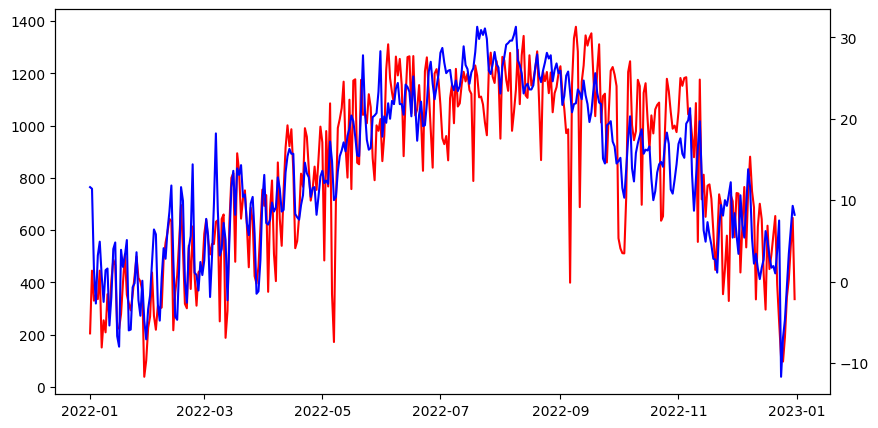

In [30]:
# Create figure and axis objects with subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp_sorted['trips_per_day'], color="red")

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the same plot
ax2 = ax.twinx()

# Make a plot with the temperatures on the y-axis using the second axis object
ax2.plot(df_temp_sorted["avgTemp"], color="blue")

plt.show()

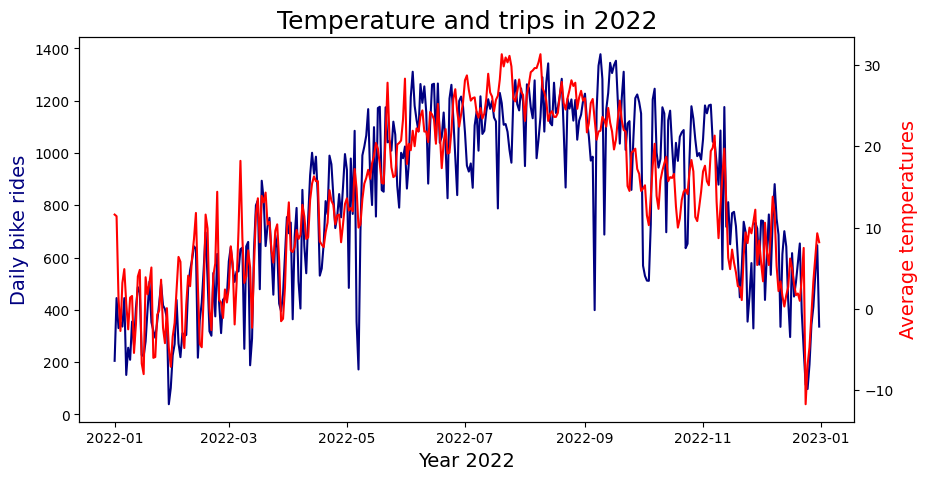

In [32]:
# Create figure and axis objects with subplots() and details
fig, ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp_sorted['trips_per_day'], color="navy")
ax.set_xlabel("Year 2022", fontsize=14)  # Set x-axis label
ax.set_ylabel("Daily bike rides", color="navy", fontsize=14)  # Set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the same plot
ax2 = ax.twinx()

# Make a plot with the temperatures on the y-axis using second axis object
ax2.plot(df_temp_sorted["avgTemp"], color="red")
ax2.set_ylabel("Average temperatures", color="red", fontsize=14)

# Set the title
plt.title('Temperature and trips in 2022', fontsize=18)

# Show the plot
plt.show()

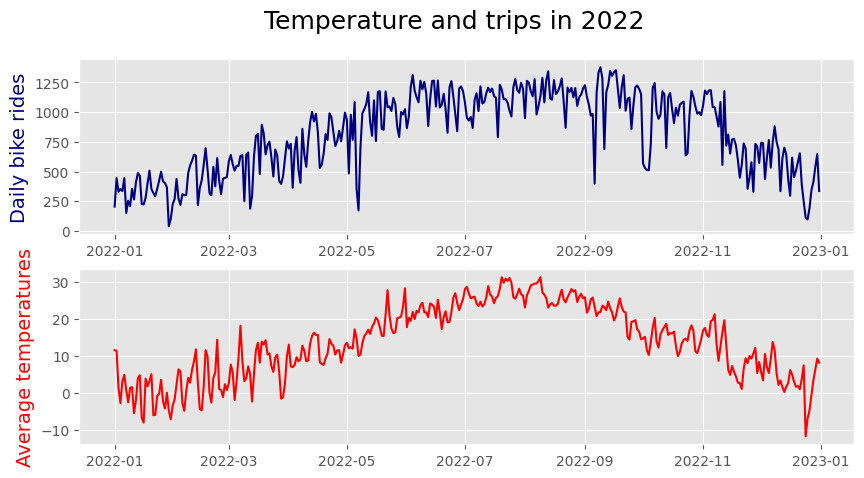

In [34]:
plt.style.use('ggplot')

# Create figure and axis objects with subplots() and details
fig, ax = plt.subplots(2, figsize=(10, 5))

# Make a plot of the bike rides in the first subplot
ax[0].plot(df_temp_sorted['trips_per_day'], color="navy")
ax[0].set_ylabel("Daily bike rides", color="navy", fontsize=14)  # Set y-axis label for bike rides

# Make a plot of the temperatures in the second subplot
ax[1].plot(df_temp_sorted["avgTemp"], color="red")
ax[1].set_ylabel("Average temperatures", color="red", fontsize=14)  # Set y-axis label for temperatures

# Add a super title for the entire figure
plt.suptitle('Temperature and trips in 2022', fontsize=18)

# Show the plot
plt.show()

### Explanation of Code

In this code, I used **Matplotlib's object-oriented approach** to create a dual-axis plot showing daily bike rides and average temperatures for the year 2022.

- **Object-Oriented Programming (OOP) Paradigm**:  
  I utilized the `ax` (axes) and `fig` (figure) objects, which are fundamental to Matplotlib's object-oriented API. These objects are created using `plt.subplots()`. The `ax` object represents the area where the data is plotted, and the `fig` object represents the entire plot. Through these objects, I modify the plot by calling methods like `plot()`, `set_xlabel()`, and `set_ylabel()` to set the labels, plot the data, and customize the appearance.

- **Creating a Dual Axis**:  
  I created the second y-axis using `ax.twinx()`, which allows for a dual-axis plot. This is another example of OOP, where I manipulate the `ax` object to create a new axis (`ax2`), which shares the same x-axis but has its own y-axis for plotting the temperature data.

- **Encapsulation**:  
  The plot’s functionality (like plotting data and setting labels) is encapsulated in the `ax` and `fig` objects, which allows for clear and modular control over the plot's behaviour and appearance.

In summary, this code's use of objects and methods to create and modify the plot makes it an example of object-oriented programming in Matplotlib.

# BONUS TASK

## Create a histogram of the variable “trip_duration” using matplotlib

In [38]:
# Calculate trip duration in minutes
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [39]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,trips_per_day,_merge,trip_duration
0,0360019220B858ED,classic_bike,2022-01-01 15:49:46.419,2022-01-01 16:05:07.868,Little West St & 1 Pl,West St & Liberty St,40.705693,-74.016777,40.711444,-74.014847,casual,2022-01-01,11.6,205,both,15.357483
1,93ADC99756FA81A7,classic_bike,2022-01-01 23:44:41.812,2022-01-01 23:55:25.595,2 Ave & E 125 St,E 91 St & 2 Ave,40.802554,-73.933509,40.781153,-73.949630,member,2022-01-01,11.6,205,both,10.729717
2,7D829F07CA904AA2,classic_bike,2022-01-01 00:51:22.555,2022-01-01 00:59:26.449,Morton St & Washington St,Morton St & Washington St,40.731150,-74.008870,40.731150,-74.008870,member,2022-01-01,11.6,205,both,8.064900
3,FB85B0444A0087B6,classic_bike,2022-01-01 16:00:58.504,2022-01-01 16:22:51.029,Clinton Ave & Myrtle Ave,White St & Johnson Ave,40.693261,-73.968896,40.707174,-73.935810,member,2022-01-01,11.6,205,both,21.875417
4,BE60008AA6B47AF4,classic_bike,2022-01-01 13:34:53.843,2022-01-01 13:38:22.073,Catherine St & Monroe St,Fulton St & Pearl St,40.711174,-73.996826,40.707722,-74.004386,member,2022-01-01,11.6,205,both,3.470500


In [41]:
# Check summary statistics
print(df['trip_duration'].describe())

count    298380.000000
mean         18.994654
std         424.361617
min         -51.938617
25%           5.806946
50%          10.180192
75%          18.034433
max      217665.979000
Name: trip_duration, dtype: float64


### There are some issues with the `trip_duration` values:

- **Negative trip durations (min = -51.94)** – This is likely due to incorrect timestamps.
- **Extremely high maximum (max = 217,665.98 minutes ≈ 151 days!)** – There might be some outliers.
- **Very high standard deviation (std = 424.36)** – This suggests a wide range of values, likely skewing the histogram.

### Fixing the Issues

1. **Filter out negative values** (since trip duration can't be negative).
2. **Set an upper limit** (e.g., 99th percentile) to remove extreme outliers.

This will help visualize a more accurate distribution of trip durations.

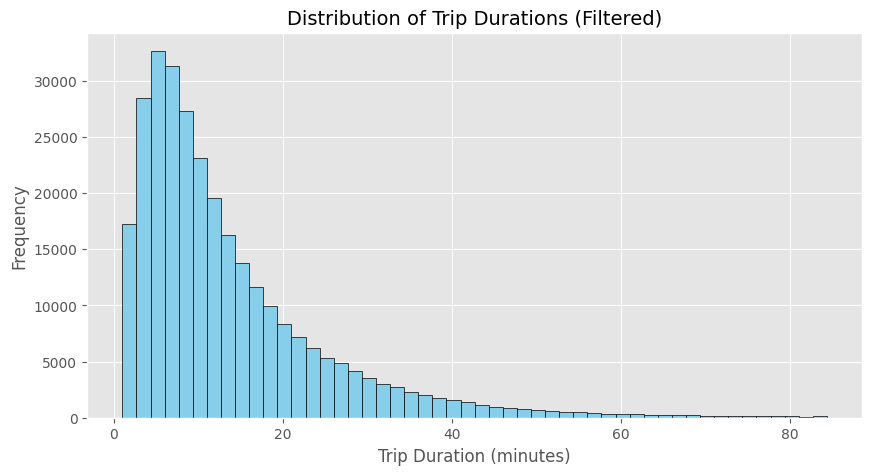

In [42]:
# Remove negative values and extreme outliers
df_filtered = df[(df['trip_duration'] > 0) & (df['trip_duration'] < np.percentile(df['trip_duration'], 99))]

# Create a histogram
plt.figure(figsize=(10, 5))
plt.hist(df_filtered['trip_duration'], bins=50, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Trip Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Trip Durations (Filtered)', fontsize=14)

# Show the plot
plt.show()

## Add a curve following the bins—use your research skills to find out how

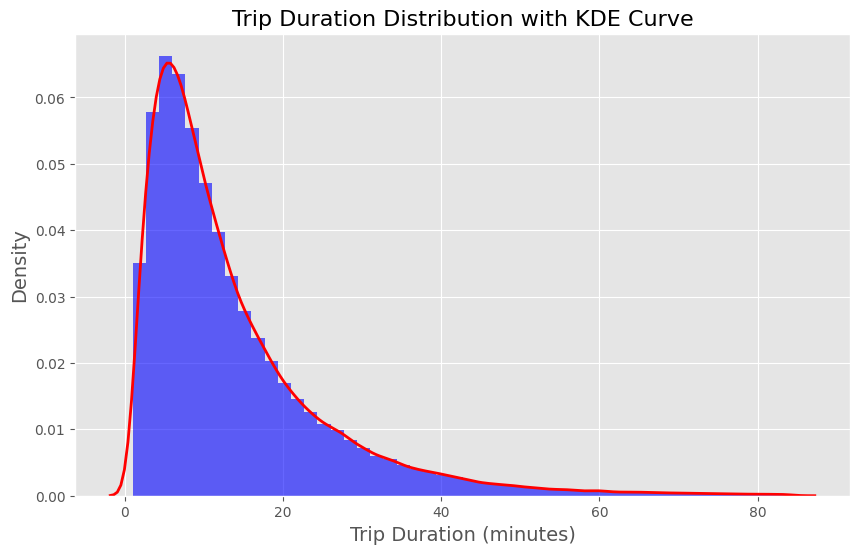

In [45]:
import seaborn as sns

# Remove negative values and apply a reasonable upper limit
filtered_data = df['trip_duration'][(df['trip_duration'] >= 0) & (df['trip_duration'] <= df['trip_duration'].quantile(0.99))]

# Plot histogram and KDE curve
plt.figure(figsize=(10, 6))

# Plot histogram with density=True
plt.hist(filtered_data, bins=50, color='blue', alpha=0.6, density=True)

# Add KDE curve
sns.kdeplot(filtered_data, color='red', linewidth=2)

# Set labels and title
plt.xlabel('Trip Duration (minutes)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Trip Duration Distribution with KDE Curve', fontsize=16)

plt.show()

### Summary of the Code: Trip Duration Distribution with Kernel Density Estimate (KDE) Curve

This code visualizes the distribution of the `trip_duration` variable using a histogram and a Kernel Density Estimate (KDE) curve.

1. **Data Filtering**: We remove values above the 99th percentile to filter out negative trip durations and extreme outliers.
2. **Histogram**: A histogram is plotted with the `density=True` argument to normalize the bars, showing the probability density instead of frequency.
3. **Kernel Density Estimate (KDE) Curve**: A smooth KDE curve is added using Seaborn's `sns.kdeplot()` to approximate the distribution of the data.
4. **Labels and Title**: The plot is labelled with appropriate axis labels and a title for clarity.

### Why Use Density and KDE?
- **Density**: Normalizing the histogram allows for better comparison across datasets of different sizes and prepares it for overlaying the KDE curve.
- **Kernel Density Estimate (KDE)**: The KDE curve provides a smooth, continuous approximation of the data’s distribution, offering better insight into its shape compared to a jagged histogram.

This approach helps to better understand the distribution and potential patterns in trip durations.